In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
%matplotlib inline

In [2]:
# Constants
DATA_PATH = "../../Data/Raw/data.csv"
PP_PATH = "../../Output/Figures/pandasProfile.html"
CLEAN_DATA_PATH = "../../Data/Processed/data.csv"

## 1. DATA COLLECTION

In [3]:
data = pd.read_csv(DATA_PATH)

## 2. DATA EXPLORATION

In [4]:
data.shape

(294, 14)

We have 294 rows of data with 14 columns

In [5]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

### Attribute Information

- Age (age in years)
- Sex (1 = male; 0 = female)
- CP (chest pain type)
- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
- CHOL (serum cholestoral in mg/dl)
- FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina (1 = yes; 0 = no))
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels (0-3) colored by flourosopy)
- THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
- TARGET (1 or 0)

In [6]:
data.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
5,32,0,2,105,198,0,0,165,0,0.0,?,?,?,0
6,32,1,2,110,225,0,0,184,0,0.0,?,?,?,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


We have missing values which have `'?'` but they don't show as missing values.
Let's fix that

In [8]:
data.describe()

,age,sex,cp,oldpeak,num
count,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,0.586054,0.360544
std,7.811812,0.447533,0.965117,0.908648,0.480977
min,28.000000,0.000000,1.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,5.000000,1.000000


In [9]:
data['num       '].value_counts()

0    188
1    106
Name: num       , dtype: int64

In [10]:
def check_unique(df):
    """"
    Checks the unique value in each column
    :param df: The dataframe
    """
    for col in df.columns:
        unique = df[col].unique()
        print("Column: {} has {} unique values\n".format(col, unique))

In [11]:
check_unique(data)

Column: age has [28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 65 66] unique values

Column: sex has [1 0] unique values

Column: cp has [2 1 3 4] unique values

Column: trestbps has ['130' '120' '140' '170' '100' '105' '110' '125' '150' '98' '112' '145'
 '190' '160' '115' '142' '180' '132' '135' '?' '108' '124' '113' '122'
 '92' '118' '106' '200' '138' '136' '128' '155'] unique values

Column: chol has ['132' '243' '?' '237' '219' '198' '225' '254' '298' '161' '214' '220'
 '160' '167' '308' '264' '166' '340' '209' '260' '211' '173' '283' '194'
 '223' '315' '275' '297' '292' '182' '200' '204' '241' '339' '147' '273'
 '307' '289' '215' '281' '250' '184' '245' '291' '295' '269' '196' '268'
 '228' '358' '201' '249' '266' '186' '207' '218' '412' '224' '238' '230'
 '163' '240' '280' '257' '263' '276' '284' '195' '227' '253' '187' '202'
 '328' '168' '216' '129' '190' '188' '179' '210' '272' '180' '100' '259'
 '468' '274' '320' '2

## 2. DATA CLEANING

In [12]:
data = data.rename(columns={'num       ':'num'})


In [13]:
def fix_missing_values(df):
    """"
    Changes ? in the data to be np.Nan
    :param df: The dataframe
    :return df: Fixed dataframe
    """
    cols = df.columns
    for col in cols:
        for i in range(len(df[col])):
            if df[col][i] == '?':
                df[col][i] = np.NaN
    return df

In [14]:
data = fix_missing_values(data)

/home/r0x6f736f646f/Documents/VENVS/qosf/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    object 
 4   chol      271 non-null    object 
 5   fbs       286 non-null    object 
 6   restecg   293 non-null    object 
 7   thalach   293 non-null    object 
 8   exang     293 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    object 
 11  ca        3 non-null      object 
 12  thal      28 non-null     object 
 13  num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [16]:
def change_dtype(df):
    """"
    Changes the data type from object to float64
    :param df: The dataframe
    :return df: Fixed dataframe
    """    
    cols = df.columns
    for col in cols:
        if df[col].dtype == 'O':
            df[col] = df[col].astype("float64")
    return df

In [17]:
data = change_dtype(data)

We will delete the columns with more than a half or its members empty
- ca
- thal
- slope

This we wil fix with the mean value since the value random values
- trestbps
- chol
- thalach

This we will fix with the mode value since they are either `0` or `1`
- fbs
- exang
- restecg


In [18]:
def fix_missing_values(df):
    def delete_missing_values(df):
        """
        Deletes the column with Null values which are less than half of its values
        """
        df = df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'num']]
        return df
    def fill_with_mean(df):
        """
        Fills the NaN values with the mean value of the column
        """
        cols = ['trestbps', 'chol', 'thalach']
        for col in cols:
            df[col].fillna(value=df[col].mean(), inplace=True)
        return df
    def fill_with_mode(df):
        """
        Fills the NaN values with the mode value of the column
        """
        cols =['fbs', 'restecg', 'exang']
        for col in cols:
            df[col].fillna(value=df[col].mode()[0], inplace=True)
        return df
    df = delete_missing_values(df)
    df = fill_with_mean(df)
    df = fill_with_mode(df)
    return df

In [19]:
data = fix_missing_values(data)

/home/r0x6f736f646f/Documents/VENVS/qosf/lib/python3.6/site-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Check duplicates

In [20]:
data.duplicated().sum()

1

In [21]:
data.drop_duplicates(inplace=True)

## 3. PROFILING

<AxesSubplot:title={'center':'Correlation with target'}>

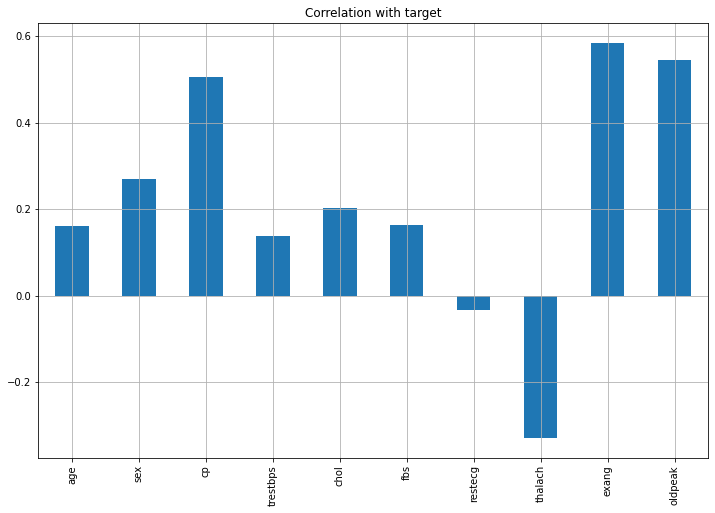

In [22]:
data.drop('num', axis=1).corrwith(data['num']).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

In [23]:
pp.ProfileReport(df=data, dark_mode=True, explorative=True)

In [24]:
pp.ProfileReport(df=data, dark_mode=True, explorative=True).to_file(PP_PATH)

In [25]:
data.to_csv(CLEAN_DATA_PATH, index=False)